<a href="https://colab.research.google.com/github/ztjohnson23/MAT494/blob/main/hw_3-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

3.2.2 Derivatives

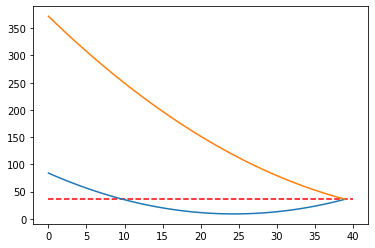

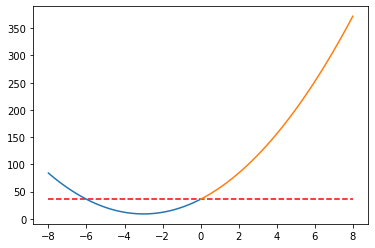

Derivative of f(x)=3*x**3 at x=2 is 36!


In [38]:
h1 = np.linspace(-8,-0.0001,num=40)
h2 = np.linspace(8,0.0001,num=40)
x = sym.symbols('x')

# Define function and x0
f = 3*x**3
x0 = 2

# Solve using definition of derivative
df1 = []
for h in h1:
  df1.append((f.subs(x,x0+h)-f.subs(x,x0))/h)
df2 = []
for h in h2:
  df2.append((f.subs(x,x0+h)-f.subs(x,x0))/h)
plt.plot(df1)
plt.plot(df2)

# Check using built-in functions
df = sym.diff(f)
df0 = df.subs(x,x0)
plt.hlines(df0,0,40,linestyles='dashed',color='red')
plt.show()

plt.plot(h1,df1)
plt.plot(h2,df2)
plt.hlines(df0,-8,8,linestyles='dashed',color='red')
plt.show()

print(f'Derivative of f(x)={f} at x={x0} is {df0}!')

By tracking $\lim\limits_{h \to 0}\frac{f(x_0+h)-f(x_0)}{h}$ as h approaches 0, we can see that $f'(x)$ approaches 36 as h nears 0 from both above and below. Confirming with Sympy's built-in derivative functions, we can see that f'(2) is in fact 36. 

3.2.3 Taylor's Theorem

In [ ]:
# Function for Taylor Approximation
def taylor(f,a,b,m):
  solution = f.subs(x,b)
  taylor_approximation = 0
  for m in range(0,m):
    if m != 0:
      f = sym.diff(f)
    taylor_approximation += f.subs(x,a) * (b-a)**m / np.math.factorial(m)
  R = solution - taylor_approximation
  return float(taylor_approximation), float(R)

In [ ]:
x = sym.symbols('x')

f = x**5/16
a = 11
b = 14
m = 6

solution = float(f.subs(x,b))
taylor_approximation, r = taylor(f,a,b,m)

print(f'Actual solution is:                  {solution}\nTaylor approximation of solution is: {taylor_approximation}\n\nR is {r}')

Actual solution is:                  33614.0
Taylor approximation of solution is: 33614.0

R is 0.0


In [ ]:
m = 4

solution = float(f.subs(x,b))
taylor_approximation, r = taylor(f,a,b,m)
print(f'Actual solution is:                  {solution}\nTaylor approximation of solution is: {taylor_approximation}\n\nR is {r}')

Actual solution is:                  33614.0
Taylor approximation of solution is: 33320.375

R is 293.625


In [ ]:
m = 2

solution = float(f.subs(x,b))
taylor_approximation, r = taylor(f,a,b,m)
print(f'Actual solution is:                  {solution}\nTaylor approximation of solution is: {taylor_approximation}\n\nR is {r}')

Actual solution is:                  33614.0
Taylor approximation of solution is: 23791.625

R is 9822.375


For a single-variable case using $f(x)=\frac{1}{16}x^5$, we can see that the solution $f(b)$ is equal to the approximation with order m-1 plus the m-order error term. Additionally, we can see that the Taylor approximation is capable of very high accuracy to the actual solution when m = 6, but becomes less accurate when m is lower. 

In [ ]:
# New function finds xi and theta
def modified_taylor(f,a,b,m):
  solution = f.subs(x,b)
  taylor_approximation = 0

  for m in range(0,m):
    if m != 0:
      f = sym.diff(f)
    taylor_approximation += f.subs(x,a) * (b-a)**m / np.math.factorial(m)

  R = solution - taylor_approximation
  f_xi = R*np.math.factorial(m+1)/(b-a)**(m+1) - sym.diff(f)
  xi = float(sym.solve(f_xi,x)[0])
  theta = (xi-a)/(b-a)

  return float(taylor_approximation),float(R),float(xi),float(theta)

In [ ]:
f = x**3
a = 1
b = 4
m = 2

t_approx, r, xi, theta = modified_taylor(f,a,b,m)
print(f'Taylor approximation of f({b}) is: {t_approx}\n')

print(f'Theta = {round(theta,3)}\n0 < {round(theta,3)} < 1\n')
print(f'Xi = {round(xi,3)}\n{a} < {round(xi,3)} < {b}\n')

solution = float(f.subs(x,b))
taylor_solution = float(f.subs(x,a) + (b-a)*sym.diff(f,x).subs(x,a) + 1/2 *(b-a)**2 *sym.diff(f,x,x).subs(x,xi))
print(f'Actual solution is: {solution}\nSolution according to Taylor Theorem is: {round(taylor_solution,1)}\n')

r_taylor = float((b-a)**m/np.math.factorial(m)*sym.diff(f,x,x).subs(x,a+theta*(b-a)))
print(f'Actual R is: {r}\nR according to Taylor Theorem is: {round(r_taylor,1)}')

Taylor approximation of f(4) is: 10.0

Theta = 0.333
0 < 0.333 < 1

Xi = 2.0
1 < 2.0 < 4

Actual solution is: 64.0
Solution according to Taylor Theorem is: 64.0

Actual R is: 54.0
R according to Taylor Theorem is: 54.0


By finding the values of theta and xi, we can confirm the Taylor theorem when m = 2. We can see that for some $a<ξ<b$, $$f(b)=f(a)+(b-a)f'(a)+\frac{1}{2}(b-a)^2f''(\xi)$$
and that $$R_m=\frac{(b-a)^m}{m!}f^{(m)}(a+θ(b-a))$$
for some $0<\theta<1$.